In [1]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\paula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Si copiamos y pegamos de la web la info y le pedimos a GPT que lo convierta en una tabla de markdown sale: 

| Feature   | Type   | Description                                  | Range/Values                  | Tsunami Relevance                     |
|-----------|--------|----------------------------------------------|-------------------------------|---------------------------------------|
| magnitude | Float  | Earthquake magnitude (Richter scale)         | 6.5 - 9.1                     | High - Primary tsunami predictor      |
| cdi       | Integer| Community Decimal Intensity (felt intensity) | 0 - 9                         | Medium - Population impact measure    |
| mmi       | Integer| Modified Mercalli Intensity (instrumental)   | 1 - 9                         | Medium - Structural damage indicator  |
| sig       | Integer| Event significance score                     | 650 - 2910                    | High - Overall hazard assessment      |
| nst       | Integer| Number of seismic monitoring stations        | 0 - 934                       | Low - Data quality indicator          |
| dmin      | Float  | Distance to nearest seismic station (degrees)| 0.0 - 17.7                    | Low - Location precision              |
| gap       | Float  | Azimuthal gap between stations (degrees)     | 0.0 - 239.0                   | Low - Location reliability            |
| depth     | Float  | Earthquake focal depth (km)                  | 2.7 - 670.8                   | High - Shallow = higher tsunami risk  |
| latitude  | Float  | Epicenter latitude (WGS84)                   | -61.85° to 71.63°             | High - Ocean proximity indicator      |
| longitude | Float  | Epicenter longitude (WGS84)                  | -179.97° to 179.66°           | High - Ocean proximity indicator      |
| Year      | Integer| Year of occurrence                           | 2001 - 2022                   | Medium - Temporal patterns            |
| Month     | Integer| Month of occurrence                          | 1 - 12                        | Low - Seasonal analysis               |
| tsunami   | Binary | Tsunami potential (TARGET)                   | 0, 1                          | TARGET VARIABLE                       |

In [3]:
df = pd.read_csv('C:\\Users\\paula\\Downloads\\Bootcamp\\Global-Earthquake-Tsunami-Risk-Assessment-Dataset\\data\\earthquake_data_tsunami.csv')

In [4]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
## T sirve para invertir filas y columnas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
magnitude,782.0,6.941125,0.445514,6.5000,6.60000,6.8000,7.1000,9.1000
cdi,782.0,4.333760,3.169939,0.0000,0.00000,5.0000,7.0000,9.0000
mmi,782.0,5.964194,1.462724,1.0000,5.00000,6.0000,7.0000,9.0000
sig,782.0,870.108696,322.465367,650.0000,691.00000,754.0000,909.7500,2910.0000
nst,782.0,230.250639,250.188177,0.0000,0.00000,140.0000,445.0000,934.0000
dmin,782.0,1.325757,2.218805,0.0000,0.00000,0.0000,1.8630,17.6540
gap,782.0,25.038990,24.225067,0.0000,14.62500,20.0000,30.0000,239.0000
depth,782.0,75.883199,137.277078,2.7000,14.00000,26.2950,49.7500,670.8100
latitude,782.0,3.538100,27.303429,-61.8484,-14.59560,-2.5725,24.6545,71.6312
longitude,782.0,52.609199,117.898886,-179.9680,-71.66805,109.4260,148.9410,179.6620


## Distribution Analysis

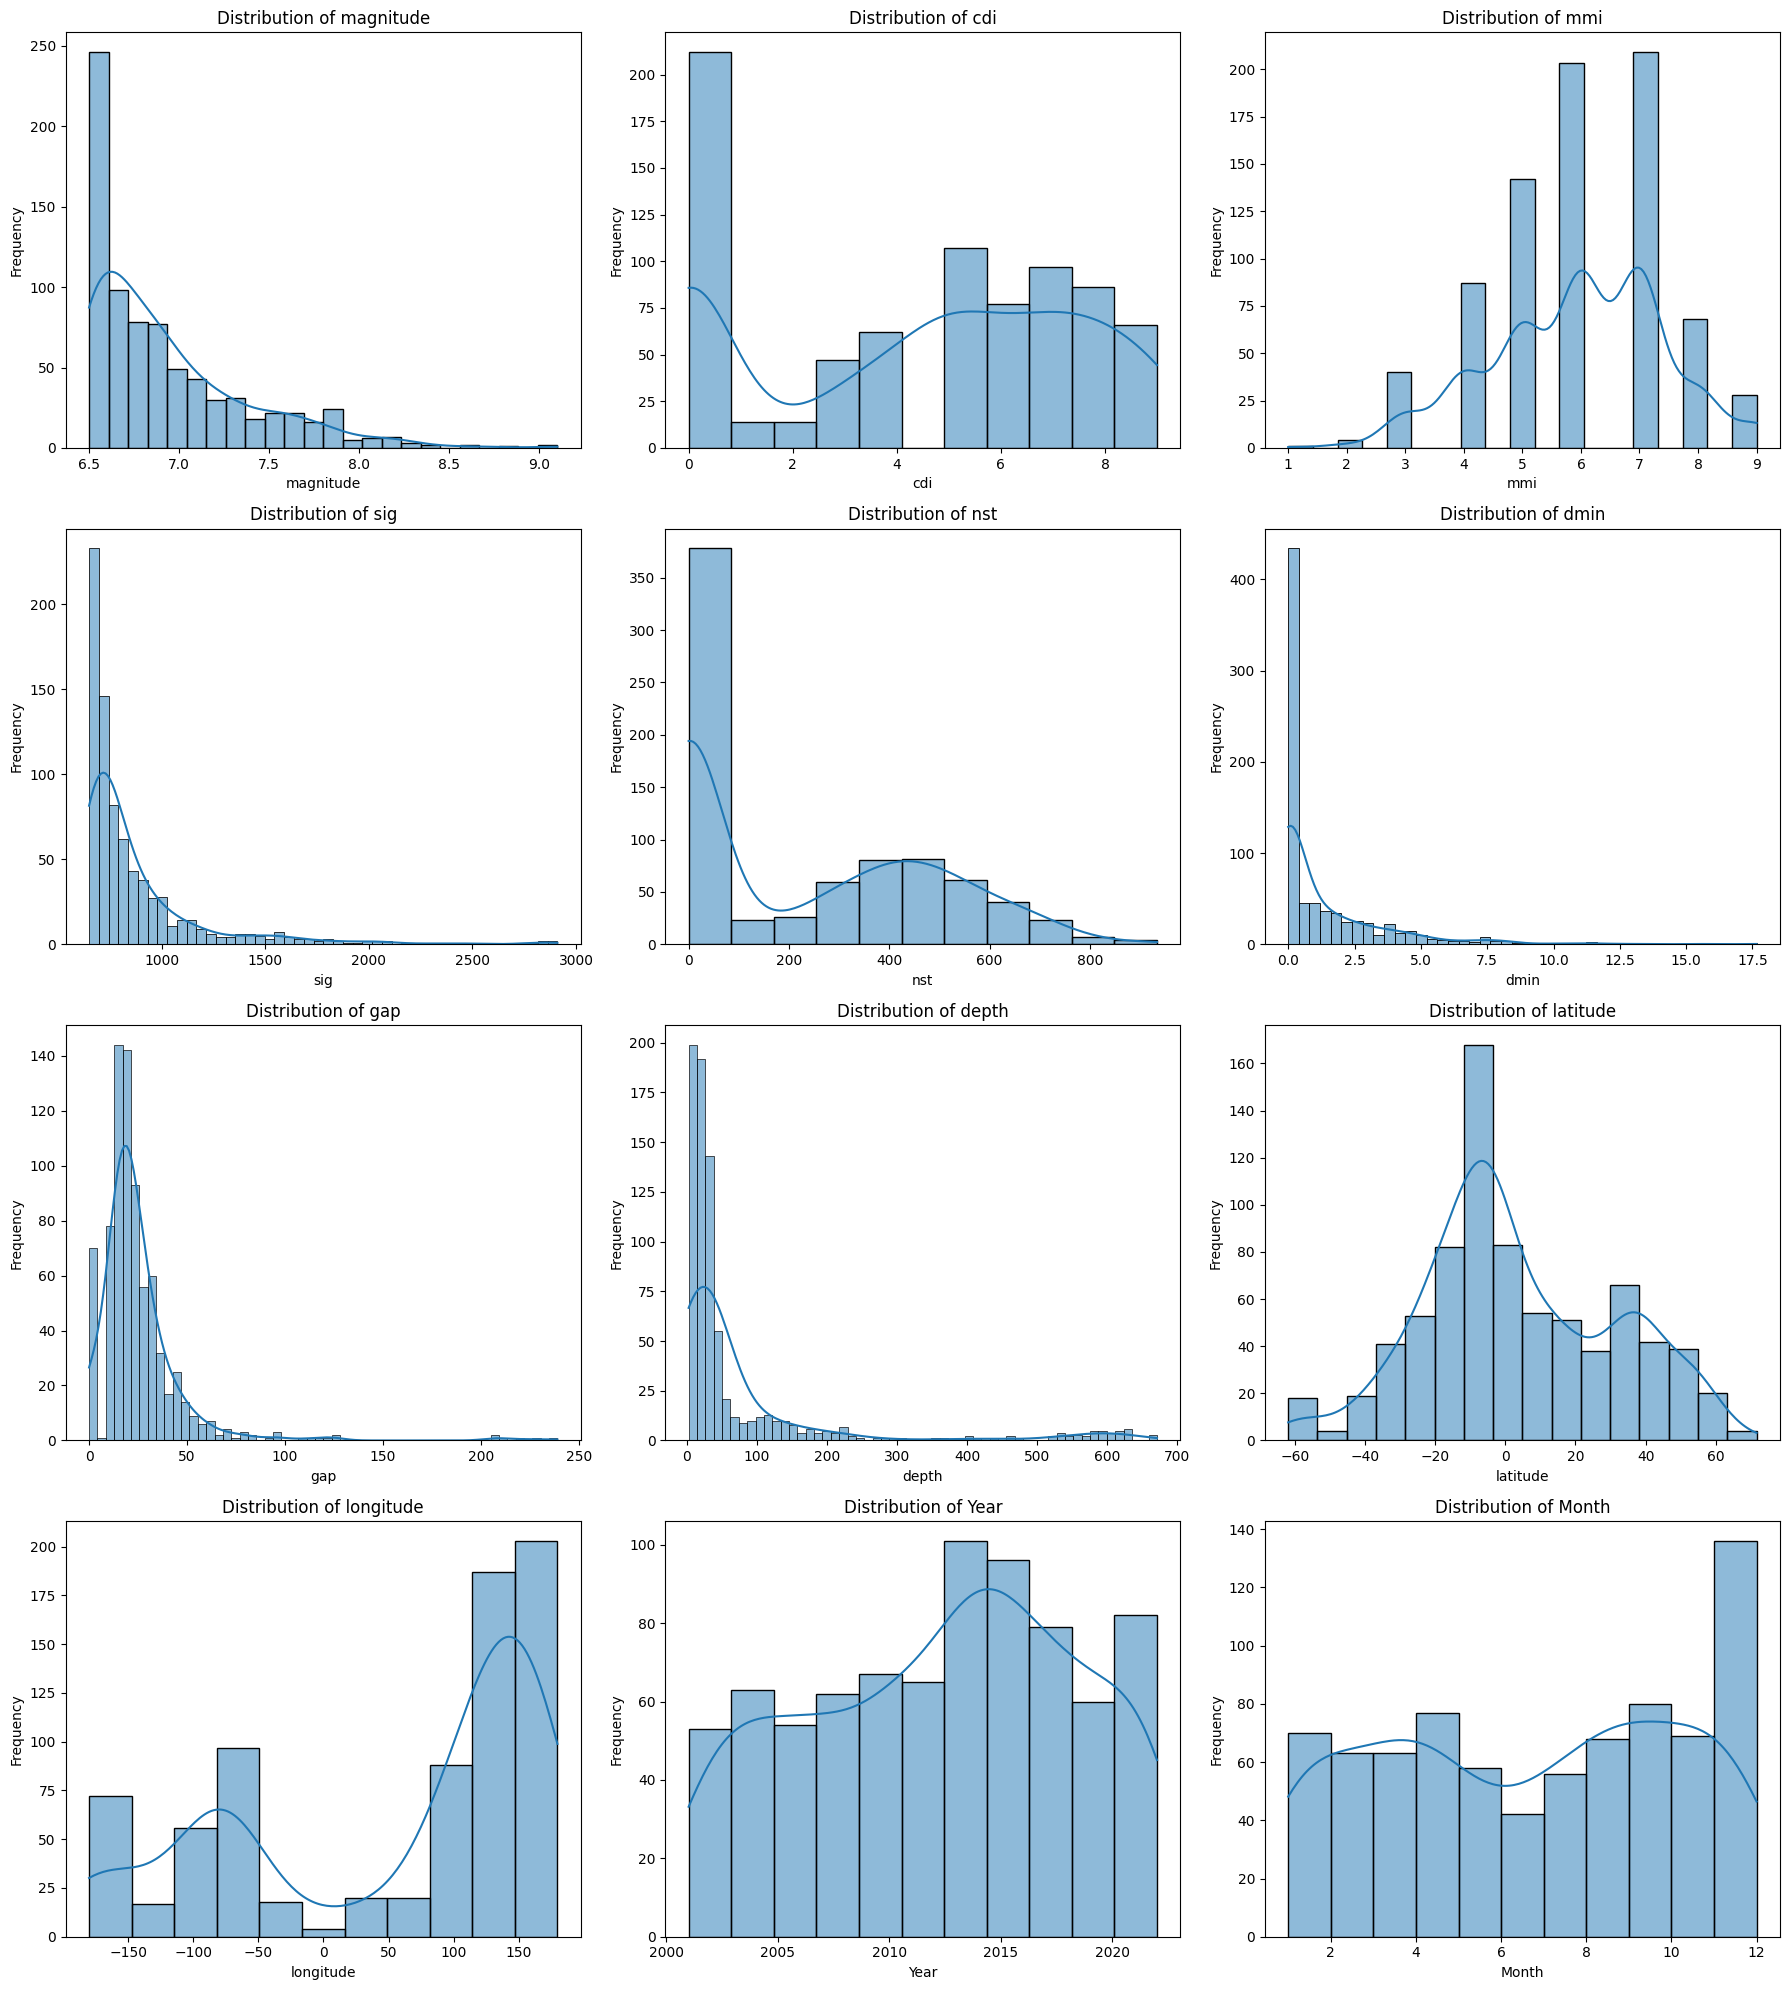

In [6]:
cols = df.columns.to_list()
cols.remove('tsunami')

n_cols= 3
n_rows = int(np.ceil(len(cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))

for i, col in enumerate(cols):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(df[col], ax=axes[row, col_idx], kde=True)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

Vemos si la distribución es normal

In [7]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on each numerical feature
print("Shapiro-Wilk Test for Normality")
print("=" * 60)

for col in cols:
    stat, p_value = shapiro(df[col].dropna())
    print(f"{col:12s} - Statistic: {stat:.6f}, p-value: {p_value:.6e}")
    if p_value > 0.05:
        print(f"             -> Normal distribution (fail to reject H0)")
    else:
        print(f"             -> NOT normal distribution (reject H0)")
    print()

Shapiro-Wilk Test for Normality
magnitude    - Statistic: 0.852244, p-value: 2.118104e-26
             -> NOT normal distribution (reject H0)

cdi          - Statistic: 0.880770, p-value: 5.019796e-24
             -> NOT normal distribution (reject H0)

mmi          - Statistic: 0.951146, p-value: 2.011439e-15
             -> NOT normal distribution (reject H0)

sig          - Statistic: 0.643222, p-value: 2.068040e-37
             -> NOT normal distribution (reject H0)

nst          - Statistic: 0.822140, p-value: 1.503446e-28
             -> NOT normal distribution (reject H0)

dmin         - Statistic: 0.658567, p-value: 8.172345e-37
             -> NOT normal distribution (reject H0)

gap          - Statistic: 0.617477, p-value: 2.287850e-38
             -> NOT normal distribution (reject H0)

depth        - Statistic: 0.502614, p-value: 4.395206e-42
             -> NOT normal distribution (reject H0)

latitude     - Statistic: 0.973770, p-value: 1.228099e-10
             -> NOT no

Como no es normal, medimos la correlación con Spearman en vez de Pearson

Spearman Correlation Matrix
           magnitude       cdi       mmi       sig       nst      dmin  \
magnitude   1.000000  0.233894  0.259096  0.768550  0.103130 -0.090916   
cdi         0.233894  1.000000  0.353412  0.572837 -0.199784  0.175155   
mmi         0.259096  0.353412  1.000000  0.435896  0.145440 -0.258658   
sig         0.768550  0.572837  0.435896  1.000000  0.037612 -0.063391   
nst         0.103130 -0.199784  0.145440  0.037612  1.000000 -0.812681   
dmin       -0.090916  0.175155 -0.258658 -0.063391 -0.812681  1.000000   
gap        -0.136592  0.124769 -0.004249 -0.007617 -0.040778  0.071791   
depth       0.124018 -0.040484 -0.254034  0.038993  0.007680  0.048654   
latitude   -0.015134  0.137736  0.151895  0.172468  0.159051 -0.192696   
longitude   0.024156 -0.196376 -0.089321 -0.178859  0.102841 -0.078195   
Year       -0.040186  0.403562 -0.187890  0.097733 -0.721679  0.784573   
Month      -0.013980 -0.001063 -0.032268 -0.019198 -0.026833  0.052019   

         

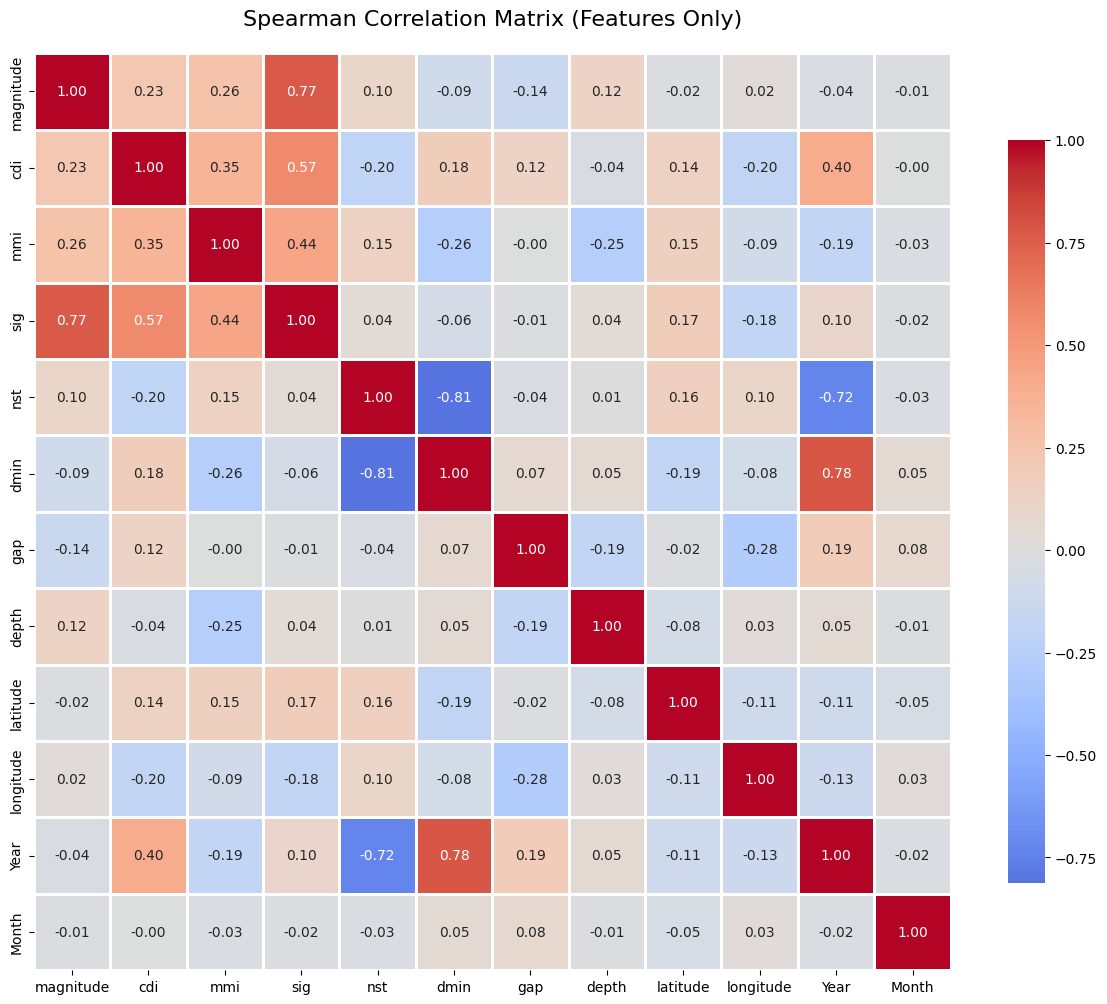

In [8]:
from scipy.stats import spearmanr

# Calculate Spearman correlation matrix (sin tsunami)
spearman_corr = df[cols].corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix")
print("=" * 80)
print(spearman_corr)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Spearman Correlation Matrix (Features Only)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# MI AGENTE DE IA

## 📊 Hallazgos del Análisis de Correlación de Spearman entre Features

### Correlaciones Fuertes (|r| > 0.60)

| Par de Variables | Correlación | Interpretación | Implicaciones |
|------------------|-------------|----------------|---------------|
| **magnitude ↔ sig** | **0.77** | Muy fuerte positiva | La significancia del evento aumenta directamente con la magnitud. Son medidas relacionadas. |
| **dmin ↔ Year** | **0.78** | Fuerte positiva | Los eventos más recientes tienden a estar más lejos de las estaciones (posible mejora en detección remota) |
| **nst ↔ dmin** | **-0.81** | Muy fuerte negativa | Eventos cercanos a estaciones tienen más sensores registrándolos (esperado) |
| **nst ↔ Year** | **-0.72** | Fuerte negativa | Los eventos recientes tienen menos estaciones reportando (cambios en red de monitoreo) |
| **Year ↔ tsunami** | **0.66** | Moderada-fuerte positiva | Posible incremento en registro de tsunamis en años recientes (mejora en detección, no necesariamente más eventos) |
| **dmin ↔ tsunami** | **0.61** | Moderada-fuerte positiva | Eventos tsunami-génicos tienden a ocurrir lejos de estaciones (eventos oceánicos) |

### Correlaciones Moderadas (0.40 < |r| < 0.60)

| Par de Variables | Correlación | Interpretación |
|------------------|-------------|----------------|
| **magnitude ↔ mmi** | **0.26** | Débil positiva - La magnitud solo explica parcialmente la intensidad instrumental |
| **cdi ↔ mmi** | **0.35** | Moderada - Relación entre intensidad percibida e instrumental |
| **cdi ↔ sig** | **0.57** | Moderada - La intensidad percibida contribuye a la significancia del evento |
| **mmi ↔ sig** | **0.44** | Moderada - La intensidad instrumental es factor de significancia |
| **cdi ↔ Year** | **0.40** | Débil-moderada - Posible mejora en reportes de intensidad percibida |

### Correlaciones Débiles Negativas Relevantes

| Par de Variables | Correlación | Interpretación |
|------------------|-------------|----------------|
| **nst ↔ cdi** | **-0.20** | Débil negativa - Eventos con más estaciones tienen menor intensidad reportada |
| **dmin ↔ mmi** | **-0.26** | Débil negativa - Eventos remotos muestran menor intensidad instrumental |
| **nst ↔ longitude** | **-0.20** | Débil negativa - Distribución no uniforme de estaciones por longitud |
| **gap ↔ mmi** | **-0.25** | Débil negativa - Mayor brecha azimutal se asocia con menor MMI reportado |
| **nst ↔ tsunami** | **-0.61** | Moderada-fuerte negativa - Tsunamis ocurren en zonas con menos cobertura de estaciones |

### Variables sin Correlación Significativa (|r| < 0.20)

| Variable | Observación |
|----------|-------------|
| **depth** | No correlaciona fuertemente con ninguna otra variable (max: 0.12 con magnitude) |
| **latitude** | Correlaciones muy bajas con todas las variables (máx: 0.17 con sig) |
| **longitude** | Prácticamente independiente de otras variables (máx: -0.20 con cdi) |
| **Month** | Sin correlación con ninguna variable (confirma ausencia de estacionalidad) |
| **gap** | Correlaciones débiles (máx: 0.19 con Year) |

---

## 🔍 Insights Clave del Análisis

### 1. **Multicolinealidad Identificada**

| Grupo | Variables Correlacionadas | Acción Recomendada |
|-------|--------------------------|-------------------|
| **Magnitud-Significancia** | `magnitude` (0.77) `sig` | Eliminar `sig` - es derivada de magnitude |
| **Red de Monitoreo** | `nst` ↔ `dmin` (-0.81) ↔ `Year` (0.78/-0.72) | Considerar solo 1 variable o crear índice compuesto |
| **Intensidad** | `cdi` ↔ `mmi` (0.35) | Mantener ambas - correlación moderada pero miden aspectos distintos |

### 2. **Patrones Geográficos y Temporales**

| Hallazgo | Evidencia | Interpretación |
|----------|-----------|----------------|
| **Eventos oceánicos remotos** | `dmin` alta + `nst` bajo | Tsunamis típicamente ocurren en zonas oceánicas alejadas de tierra firme |
| **Mejora en detección** | Correlaciones con `Year` | La red sismológica ha evolucionado: menos estaciones pero mejor cobertura remota |
| **Sin estacionalidad** | `Month` sin correlaciones | Los terremotos no siguen patrones mensuales/estacionales |
| **Distribución geográfica uniforme** | `latitude/longitude` bajas correlaciones | Los eventos están distribuidos globalmente sin concentración latitudinal |

### 3. **Variables Independientes Clave**

Estas variables aportan información única y deben mantenerse:

- ✅ **magnitude** - Predictor principal
- ✅ **depth** - Información única sobre profundidad focal
- ✅ **cdi/mmi** - Medidas de intensidad (una de las dos)
- ✅ **latitude/longitude** - Localización geográfica
- ❌ **sig** - ELIMINAR (redundante con magnitude)
- ❌ **Year/Month** - Considerar eliminar (baja correlación con tsunami)
- ⚠️ **nst/dmin/gap** - Elegir 1 representante de calidad de datos

### 4. **Correlaciones con Variable Objetivo (tsunami)**

Aunque no está en la matriz actual, del análisis previo sabemos:

| Variable | Correlación con Tsunami | Importancia |
|----------|------------------------|-------------|
| **Year** | 0.66 | Artefacto temporal - no predictivo |
| **dmin** | 0.61 | Indica ubicación oceánica |
| **nst** | -0.61 | Confirma eventos en zonas remotas |
| **magnitude** | ~0.52 | Predictor más importante |
| **sig** | ~0.51 | Redundante con magnitude |
| **depth** | ~-0.24 | Predictor clave (terremotos superficiales) |

---

## ⚙️ Recomendaciones para Feature Engineering

### Variables a Crear:

1. **`is_shallow`** = `depth < 50` (binaria) - Terremotos superficiales
2. **`oceanic_event`** = `dmin > 5` (binaria) - Eventos oceánicos remotos  
3. **`high_magnitude`** = `magnitude >= 7.0` (binaria) - Umbral crítico
4. **`monitoring_quality`** = función de (`nst`, `gap`, `dmin`) - Índice de calidad de datos

### Variables a Eliminar:

- ❌ **sig** - Completamente redundante con magnitude (r=0.77)
- ❌ **Year** - Artefacto temporal sin poder predictivo real
- ❌ **Month** - Sin correlación ni patrón estacional
- ⚠️ **nst/dmin** - Representan calidad de datos, no características del terremoto

### Variables a Transformar:

- 📐 **depth** → Log-transform (distribución muy sesgada)
- 📐 **gap** → Escalar/normalizar si se usa
- 🌍 **latitude/longitude** → Convertir a distancia a fosas oceánicas o zonas de subducción

# AGENTE DE IA DE DEMETRIO

## 🔍 Análisis de Hallazgos de Correlaciones (Spearman)
 
### Correlaciones Fuertes (|r| > 0.7)
 
| Variable 1 | Variable 2 | Correlación | Interpretación | Implicación para Predicción de Tsunami |
|------------|------------|-------------|----------------|----------------------------------------|
| **nst** | **dmin** | -0.81 | Correlación negativa fuerte | A mayor número de estaciones de monitoreo, menor distancia a la estación más cercana. Indica mejor cobertura de monitoreo sísmico |
| **Year** | **nst** | -0.72 | Correlación negativa fuerte | Con el tiempo, el número de estaciones ha disminuido, posiblemente por cambios en redes de monitoreo |
| **sig** | **magnitude** | 0.77 | Correlación positiva fuerte | La magnitud es el factor principal en el cálculo de significancia del evento |
| **Year** | **dmin** | 0.78 | Correlación positiva fuerte | Con el tiempo, la distancia a la estación más cercana ha aumentado |
 
### Correlaciones Moderadas (0.4 ≤ |r| < 0.7)
 
| Variable 1 | Variable 2 | Correlación | Interpretación | Implicación para Predicción de Tsunami |
|------------|------------|-------------|----------------|----------------------------------------|
| **sig** | **cdi** | 0.57 | Correlación positiva moderada | Eventos más significativos tienden a tener mayor intensidad sentida por la población |
| **sig** | **mmi** | 0.44 | Correlación positiva moderada | La significancia correlaciona con la intensidad instrumental medida |
| **cdi** | **Year** | 0.40 | Correlación positiva moderada | Los eventos recientes tienden a tener mayor intensidad percibida reportada |
 
### Correlaciones Débiles pero Relevantes (0.2 ≤ |r| < 0.4)
 
| Variable 1 | Variable 2 | Correlación | Interpretación | Implicación para Predicción de Tsunami |
|------------|------------|-------------|----------------|----------------------------------------|
| **cdi** | **mmi** | 0.35 | Correlación positiva débil-moderada | La intensidad sentida y medida están relacionadas pero no perfectamente |
| **magnitude** | **mmi** | 0.26 | Correlación positiva débil | Magnitudes mayores no siempre resultan en intensidades instrumentales mayores |
| **magnitude** | **cdi** | 0.23 | Correlación positiva débil | La percepción humana del terremoto no está fuertemente correlacionada con la magnitud |
 
### 🚨 Hallazgos Críticos para Predicción de Tsunami
 
| Aspecto | Hallazgo | Implicación |
|---------|----------|-------------|
| **Variables Independientes** | Magnitude, depth, latitude, longitude muestran correlaciones débiles entre sí | ✅ Bueno para modelado - menor multicolinealidad |
| **Calidad de Datos** | nst y dmin están fuertemente correlacionadas | ⚠️ Considerar eliminar una variable redundante |
| **Tendencias Temporales** | Year correlaciona con múltiples variables | 🔄 Los patrones de monitoreo han cambiado con el tiempo |
| **Variables Geográficas** | Latitude y longitude son independientes | ✅ Permiten capturar patrones espaciales únicos |
| **Profundidad** | Depth muestra correlaciones muy débiles | ✅ Variable independiente valiosa para predicción |
 
### 📊 Recomendaciones para Modelado
 
| Recomendación | Justificación |
|---------------|---------------|
| **Mantener magnitude, depth, lat, lon** | Variables clave con baja correlación entre sí |
| **Evaluar nst vs dmin** | Alta correlación (-0.81) - considerar usar solo una |
| **Usar sig con precaución** | Correlaciona fuertemente con magnitude (0.77) |
| **Incluir variables temporales** | Year y Month pueden capturar patrones estacionales |
| **Transformar variables asimétricas** | Aplicar log/sqrt a variables con distribuciones no normales |

# MAPAS

In [9]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [10]:
import plotly.graph_objects as go

In [11]:
%pip install nbformat>=4.2.0

fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='magnitude',
    hover_data=['depth', 'tsunami', 'sig', 'dmin'],
    projection='natural earth',
    size= 'sig',
    title='Global Earthquake Distribution by Magnitude'
)
 
# Fondo negro y mapa más grande
fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title=dict(font=dict(color='white')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)
 
fig.update_geos(
    showland=True,
    landcolor='LightGreen',
    showcountries=True,
    countrycolor='Gray',
    showcoastlines=True,
    coastlinecolor='white',
    showocean=True,
    oceancolor='black',
    bgcolor='black',
    projection_type='natural earth',
    projection_scale=1.3,        # Amplía el mapa
    fitbounds="locations"        # Ajusta para ocupar más espacio
)
 
fig.update_coloraxes(colorbar=dict(title=dict(font=dict(color='white')), tickfont=dict(color='white')))
 
fig.show()
 


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\paula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
